## 2-b+c+d Working on a gray image

In [1]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from skimage import data,filters,io,transform,feature,segmentation,restoration,util,color

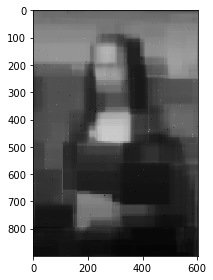

In [2]:
# use gray image 

img = io.imread('data/monalisa_ori.jpg', as_gray=True) #grayscale 
img = np.array(img, dtype=np.float32)

# meshgrid, get coordinate locations
x = np.arange(0, img.shape[1])
y = np.arange(0, img.shape[0])
locations = np.meshgrid(y,x)
locations = np.stack(locations, axis=-1).reshape(-1, 2)

# sample points: uniformly sample 5,000 random (x,y) coordinate locations, to build a training set

num_sample_points = 5000
np.random.shuffle(locations)
sample_points = locations[:num_sample_points]
test_points = locations[num_sample_points:]

# pixels match
sample_point_pixels = np.array([img[x[0], x[1]] for x in sample_points], dtype='float32')
test_point_pixels = np.array([img[x[0], x[1]] for x in test_points], dtype='float32')

# normalize the coordinates
normalized_sample_points = sample_points.copy().astype('float32')
normalized_test_points = test_points.copy().astype('float32')
normalized_sample_points[:, 0] /= img.shape[0]
normalized_sample_points[:, 1] /= img.shape[1]
normalized_test_points[:, 0] /= img.shape[0]
normalized_test_points[:, 1] /= img.shape[1]

# use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
x_train = normalized_sample_points
y_train = sample_point_pixels
x_test = normalized_test_points
y_test = test_point_pixels

rfr = RandomForestRegressor(n_estimators=50, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

# combine points and sample points
image = np.zeros_like(img)
for point, pixel in zip(sample_points, sample_point_pixels):
    image[point[0], point[1]] = pixel
for point, pixel in zip(test_points, y_pred):
    image[point[0], point[1]] = pixel

# show the final image
image = (image * 255).astype('uint8')
io.imshow(image)

In [3]:
# model evaluation

from sklearn import metrics

MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error(MSE)=', MSE)

Mean Squared Error(MSE)= 0.0057140428558273984
